# 주성분 분석
* 데이터의 차원을 줄이는 방법
* 중요한 특성을 최대한 유지하면서 덜 중요한 부분을 제거해 더 적은 수의 차원으로 데이터를 표현 == 원본 데이터에 있는 특성 개수보다 적음

## 차원 축소
* 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류
  * 저장 공간을 줄이고 시각화하기 쉬움
  * 다른 알고리즘의 성능을 높일 수 있음

## 설명된 분산 (Explained Variance)
* 주성분 분석에서 각 주성분이 원래 데이터의 분산 중 얼마나 많은 부분을 차지하고 있는지를 나타내는 값


## PCA
* 주성분 분석을 수행하는 클래스
* `n_component` : 주성분의 개수
* `random_state` : numpy 난수 시드 값 지정
* `component_` : 훈련 세트에서 찾은 주성분 저장
* `explained_variance_` : 설명된 분산 저장
* `explained_variance_ratio` : 설명된 분산 비율 저장
* `inverse_transform()` : transform() 메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원

### 주성분 분석에서의 비지도 차원 축소
* 여러가지 특성 추출 기법을 사용해 데이터셋의 특성 개수를 줄일 수 있음
* 특성 선택 <-> 특성 추출
  * 원본 특성을 유지하느냐 안 하느냐의 차이
  * ex. **순차 후진 선택**: 특성 선택 알고리즘 (원본 특성 유지)
  * 특성 추출은 새로운 특성 공간으로 데이터를 변환하거나 투영
* 차원 축소 관점
  * 특성 추출: 관련 있는 정보 유지 + 데이터 압축

== 데이터가 복잡하고 높은 차원을 가지며 2차원 또는 3차원으로 표현하기 위해 사용

### PCA
* 비지도 선형 변환 기법
* 특성 추출과 차원 축소에서 使
* 사례
1. 주식 거래 시장의 잡음 제거
2. 생물 정보학 분야 (게놈 데이터, 유전자 발현 분석)


## PCA 클래스

In [1]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2024-11-18 13:56:33--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2024-11-18 13:56:34--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2024-11-18 13:56:34--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443..

In [2]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
#PCA 클래스 적용
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
#크기 살펴보기
print(pca.components_.shape)

(50, 10000)


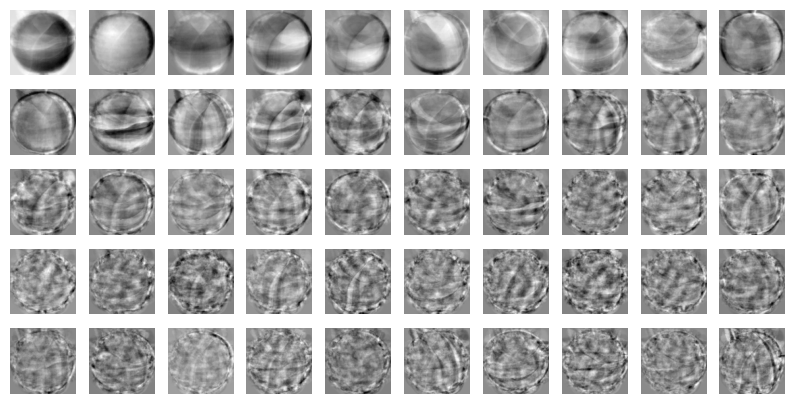

In [6]:
# 그림 그리기 함수 정의
#이미지 검색
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i * 10 + j < n:
        axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
# 크기
print(fruits_2d.shape)

(300, 10000)


In [8]:
#2D변형
fruits_pca = pca.transform(fruits_2d)

In [9]:
#크기
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

* 10,000개의 특성을 50개로 줄여서 재구성

In [10]:
#변형
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

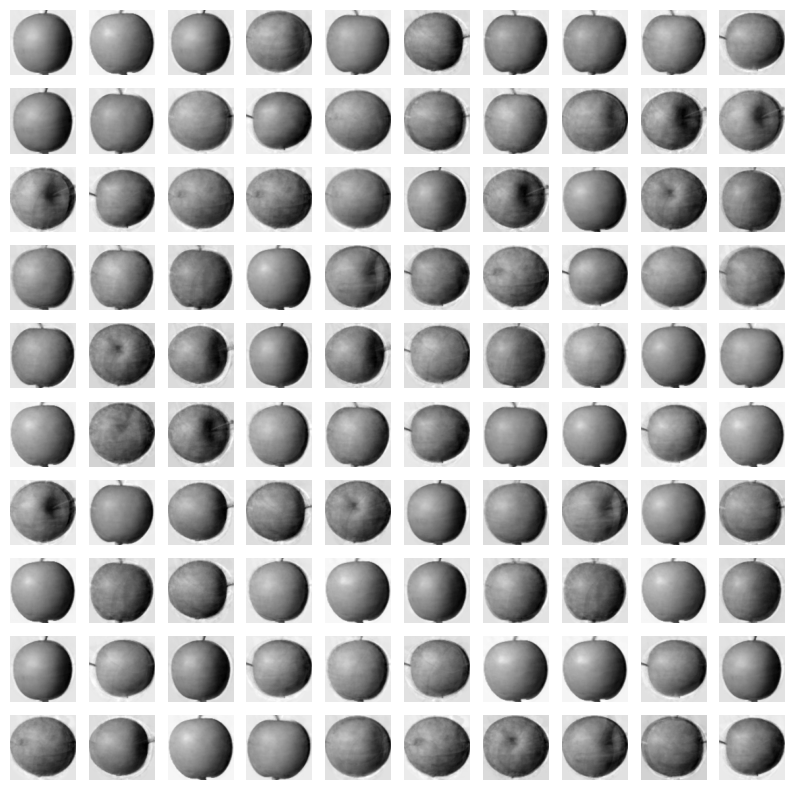

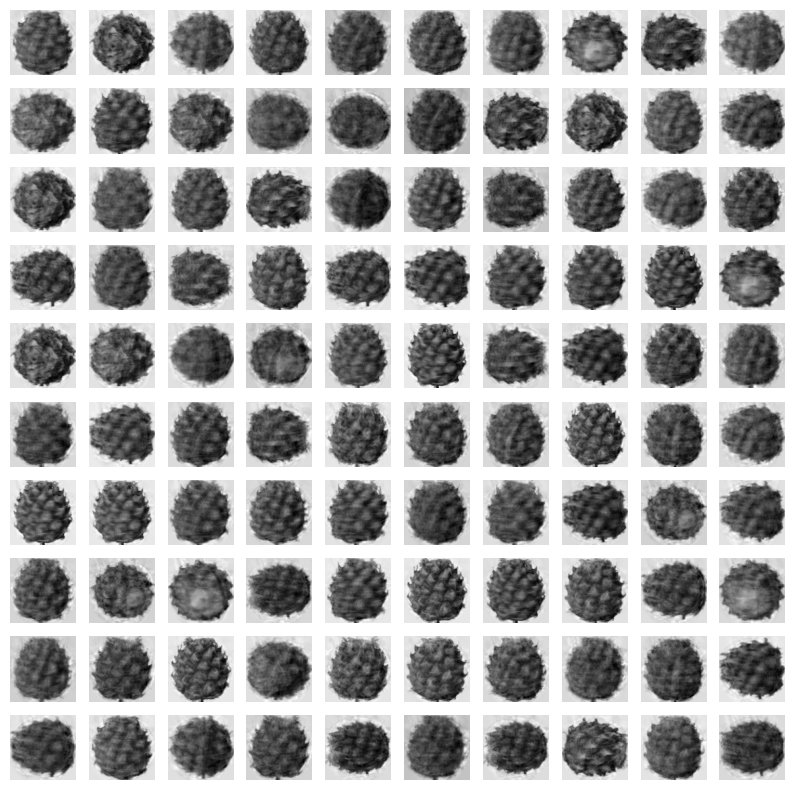

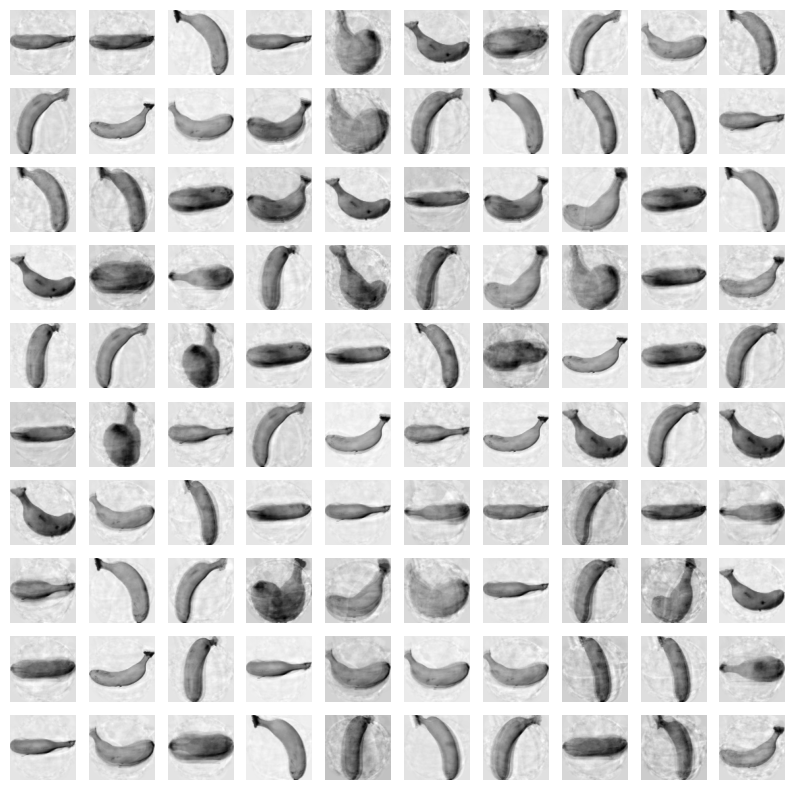

In [12]:
#그리기
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

## 설명된 분산
* 주성분이 원본 데이터의 분산을 얼마나 나타내는지 기록한 값
* 주성분의 설명된 분산 비율이 기록되어 있음


In [15]:
#분산 출력
print(np.sum(pca.explained_variance_ratio))

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio'

In [16]:
#시각화
plt.plot(pca.explained_variance_ratio)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio'

훈련이 안 되어서 오류 발생

In [23]:
pca = PCA(n_components=50)
pca.fit(fruits_inverse)
print(np.sum(pca.explained_variance_ratio_))

1.0000000000000004


## 다른 알고리즘과 함께 사용하기

In [24]:
#로지스틱 알고리즘 적용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [26]:
#타게 구하기
target = np.array([0]*100+[1]*100+[2]*100)

In [29]:
#교차 검증
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))

0.9966666666666667


In [30]:
print(np.mean(scores['fit_time']))

0.8997162342071533


In [32]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.010959005355834961


In [33]:
#PCA 값 변경
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [34]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [35]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))


0.9933333333333334
0.02203078269958496


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [40]:
#Kmean
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [41]:
#고유값 출력
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


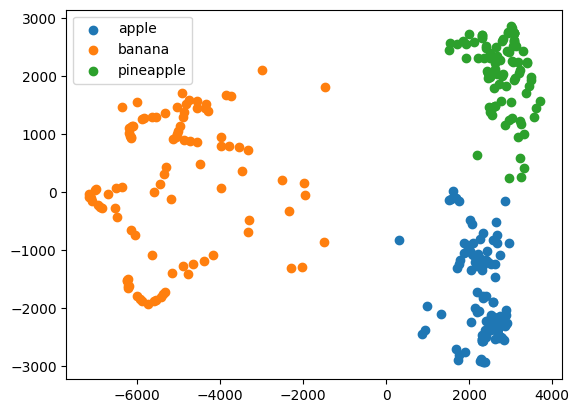

In [42]:
#이미지 그리기
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()